In [2]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.transforms import *
import PIL
import math
#get_ipython().magic('matplotlib inline')
from sklearn.decomposition import PCA
import gseapy as gp
from gseapy.plot import gseaplot
gp.__path__
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path.append("../")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

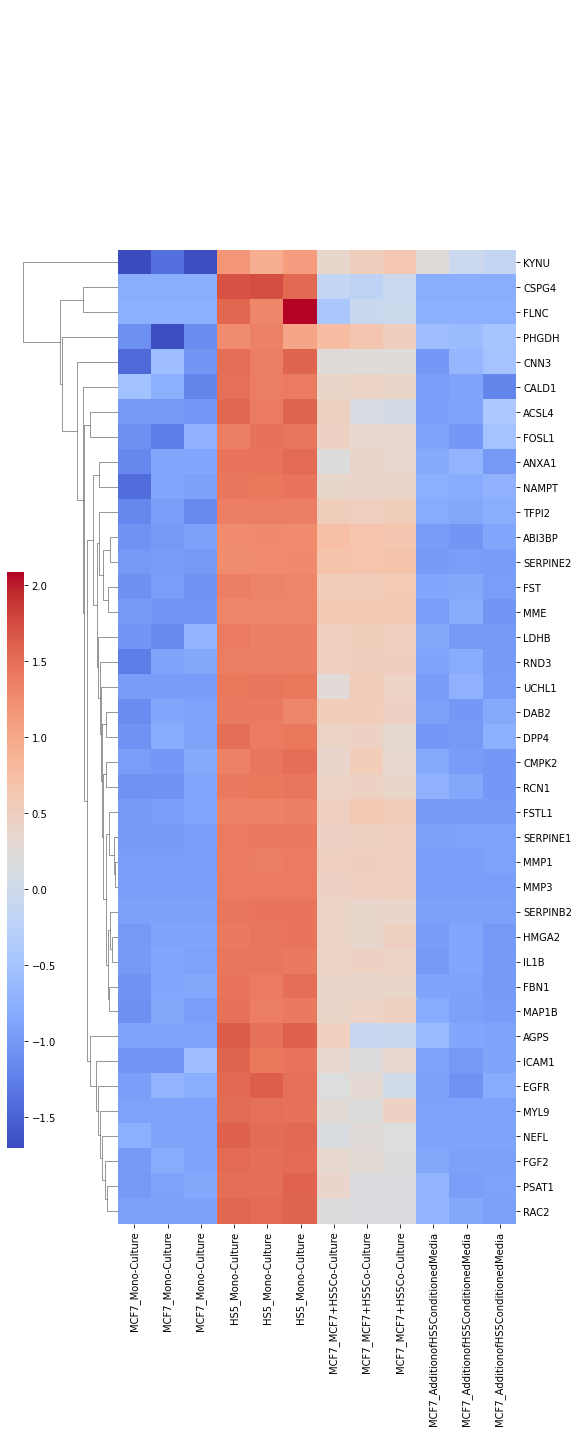

In [3]:
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf
def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Saptarshi'
    d['Subject'] = "heatmap"
    d['Keywords'] = 'heatmap'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()
    
cfile = "/Users/sinha7290/public_html/BoNE/heatmaps/1D_39.pdf"
pdf = getPDF(cfile)

#data = pd.read_csv('/booleanfs2/sahoo/Data/Pradipta/RNASeq/Zarrinpar/Zarrinpar-2021-aging-expr.txt', sep='\t')
data = pd.read_csv('/booleanfs2/sahoo/Data/Pradipta/RNASeq/Luker/Luker-2021-bc-expr.txt', sep='\t')
del data['ArrayID']
#del data['ProbeID']

#Reverbα

#genes = ['SLCO2A1', 'SLCO2B1', 'ABCA1', 'ABCC1', 'ABCC2', 'ABCC3', 'ABCC4', 'ABCC5', 'ABCG2', 'SLC10A2', 'SLC15A2', 'SLC22A1', 'SLC22A11', 'SLC22A16', 'SLC22A3', 'SLC22A31', 'SLC22A4', 'SLC22A5', 'SLC28A1', 'SLC28A2', 'SLC28A3', 'SLC2A6', 'SLC34A2', 'SLC47A1', 'SLC5A8', 'SLCO1A2', 'SLCO1B1', 'SLCO3A1', 'SLCO4A1', 'SLC23A1', 'SLC23A2', 'SLC23A3']

genes = ['ABI3BP', 'ACSL4', 'AGPS', 'ANXA1', 'CALD1', 'CMPK2', 'CNN3', 'CSPG4', 'DAB2', 'DPP4', 'EGFR', 'FBN1', 'FGF2', 'FLNC', 'FOSL1', 'FST', 'FSTL1', 'HMGA2', 'ICAM1', 'IL1B', 'LDHB', 'MAP1B', 'MME', 'MMP1', 'MMP3', 'MYL9', 'NAMPT', 'NEFL', 'PHGDH', 'PSAT1', 'RAC2', 'RCN1', 'RND3', 'SERPINB2', 'SERPINE1', 'SERPINE2', 'TFPI2', 'UCHL1', 'KYNU']

#genes = ['ABI3BP', 'ACSL4', 'ADAMTS1', 'ADM', 'AHNAK2', 'C1R', 'CCDC80', 'CCDC88A', 'CCN3', 'CDC42EP3', 'CDCP1', 'CEBPB', 'CEMIP', 'CLDN11', 'COL1A1', 'COL1A2', 'COL3A1', 'COL6A1', 'CXCL3', 'CXCL8', 'DCN', 'DPP4', 'DRAM1', 'DSEL', 'DUSP6', 'DZIP1', 'EBF1', 'EMP1', 'FAM126A', 'FBN1', 'FGF2', 'FGF5', 'FN1', 'FST', 'FSTL1', 'FYN', 'GADD45A', 'GBP1', 'GNG11', 'GPNMB', 'GREM1', 'HAS2', 'HMGA2', 'IER3-AS1', 'IFI16', 'IFI44L', 'IFI6', 'IFIT1', 'IFIT2', 'IFIT5', 'IGF2BP2', 'IL1B', 'INHBA', 'JAM2', 'LAMA4', 'LDHB', 'LMO4', 'MAP1B', 'MARS1', 'MDFIC', 'MEG3', 'MME', 'MMP1', 'MMP3', 'NAMPT', 'NIBAN1', 'NT5E', 'OAS1', 'PALM2AKAP2', 'PARP14', 'PARP9', 'PHLDA1', 'POU2F2', 'PRNP', 'PRRX1', 'PTGS2', 'PTX3', 'RAI14', 'RCN1', 'RND3', 'RPS4Y1', 'RSAD2', 'SERPINB2', 'SERPINE1', 'SERPINE2', 'SGCE', 'SLC7A11', 'SOD2', 'SP110', 'SPAG16', 'TAP2', 'TBX3', 'TCEAL9', 'TFPI2', 'TNC', 'VEGFA', 'VIM', 'WARS1', 'WNT5A', 'XAF1']
#single gene

data['Name'] = data['Name'].str.split(':', expand=True)[0]
data = data.set_index('Name', drop=True)
values = data.index.isin(genes)
data = data[values]
data = data.drop_duplicates()
#data =data[[M615760', 'GSM615206', 'GSM615289', 'GSM615809', 'GSM615350', 'GSM615356', 'GSM615345', 'GSM615196', 'GSM615792', 'GSM615814', 'GSM615121', 'GSM615726', 'GSM615256', 'GSM615188', 'GSM615253', 'GSM615216', 'GSM615634', 'GSM615645', 'GSM615789', 'GSM615662', 'GSM615720', 'GSM615736', 'GSM615669', 'GSM615795', 'GSM615749', 'GSM615635', 'GSM615808', 'GSM615391', 'GSM615235', 'GSM615358', 'GSM615238', 'GSM615373', 'GSM615267', 'GSM615129', 'GSM615633', 'GSM615343', 'GSM615377', 'GSM615655', 'GSM615821', 'GSM615308', 'GSM615279', 'GSM615401', 'GSM615174', 'GSM615123', 'GSM615138', 'GSM615788', 'GSM615670', 'GSM615735', 'GSM615802', 'GSM615404', 'GSM615708', 'GSM615108', 'GSM615709', 'GSM615398', 'GSM615304', 'GSM615673', 'GSM615309', 'GSM615200', 'GSM615353', 'GSM615153', 'GSM615702', 'GSM615281', 'GSM615163', 'GSM615269', 'GSM615227', 'GSM615367', 'GSM615652', 'GSM615793', 'GSM615775', 'GSM615803', 'GSM615822', 'GSM615812', 'GSM615796', 'GSM615280', 'GSM615302', 'GSM615340', 'GSM615159', 'GSM615771', 'GSM615130', 'GSM615762', 'GSM615823', 'GSM615678', 'GSM615139', 'GSM615785', 'GSM615778', 'GSM615754', 'GSM615250', 'GSM615271', 'GSM615282', 'GSM615157', 'GSM615274', 'GSM615753', 'GSM615230', 'GSM615197', 'GSM615249', 'GSM615774', 'GSM615405', 'GSM615215', 'GSM615342', 'GSM615286', 'GSM615182', 'GSM615805', 'GSM615189', 'GSM615652', 'GSM615793', 'GSM615775', 'GSM615803', 'GSM615822', 'GSM615812', 'GSM615796', 'GSM615280', 'GSM615302', 'GSM615340', 'GSM615159', 'GSM615771', 'GSM615130', 'GSM615762', 'GSM615823', 'GSM615678', 'GSM615139', 'GSM615785', 'GSM615778', 'GSM615754', 'GSM615250', 'GSM615271', 'GSM615282', 'GSM615157', 'GSM615274', 'GSM615753', 'GSM615230', 'GSM615197', 'GSM615249', 'GSM615774', 'GSM615405', 'GSM615215', 'GSM615342', 'GSM615286', 'GSM615182', 'GSM615805', 'GSM615189']]


data =data[['139615', '285-JB-2', '285-JB-3', '285-JB-8', '285-JB-7', '285-JB-9', '285-JB-13', '285-JB-15', '285-JB-14', '1454-JB-3', '1454-JB-4', '1454-JB-2']]

#data =data[['285-JB-13', '285-JB-15', '1454-JB-16', '285-JB-7', '139619', '285-JB-29', '285-JB-30', '139616', '1454-JB-1', '1454-JB-18', '285-JB-3', '285-JB-1', '285-JB-19', '1454-JB-4', '139618', '139620', '285-JB-21', '1454-JB-2']]

#data.index = pd.CategoricalIndex(data.index, categories= ['SLCO2A1', 'SLCO2B1', 'ABCA1', 'ABCC1', 'ABCC2', 'ABCC3', 'ABCC4', 'ABCC5', 'ABCG2', 'SLC10A2', 'SLC15A2', 'SLC22A1', 'SLC22A11', 'SLC22A16', 'SLC22A3', 'SLC22A31', 'SLC22A4', 'SLC22A5', 'SLC28A1', 'SLC28A2', 'SLC28A3', 'SLC2A6', 'SLC34A2', 'SLC47A1', 'SLC5A8', 'SLCO1A2', 'SLCO1B1', 'SLCO3A1', 'SLCO4A1', 'SLC23A1', 'SLC23A2', 'SLC23A3'])


#data.index = pd.CategoricalIndex(data.index, categories= ['CCN3', 'DSEL', 'EMP1', 'GPNMB', 'PRNP', 'RCN1', 'DRAM1', 'FAM126A', 'CCDC80', 'ADAMTS1', 'COL3A1', 'CDC42EP3', 'JAM2', 'CCDC88A', 'FSTL1', 'MAP1B', 'IL1B', 'GREM1', 'COL1A1', 'COL1A2', 'COL6A1', 'LMO4', 'C1R', 'SOD2', 'PARP9', 'PARP14', 'CEBPB', 'VEGFA', 'OAS1', 'POU2F2', 'AHNAK2', 'INHBA', 'FGF2', 'CEMIP', 'WNT5A'])
#single gene


#data.index = pd.CategoricalIndex(data.index, categories= ['ABI3BP', 'ACSL4'])
#single gene

data.sort_index(level=0, inplace=True)
data.reset_index(inplace=True)
#data.columns = ['Name','Addition of HS5 Conditioned Media1', 'Addition of HS5 Conditioned Media2', 'Addition of HS5 Conditioned Media3', 'Mono-CultureHS51', 'Mono-CultureHS52', 'Mono-CultureHS53', 'Mono-CultureHS54', 'Mono-CultureHS55', 'MCF7+HS5 Co-Culture1', 'MCF7+HS5 Co-Culture2', 'MCF7+HS5 Co-Culture3', 'MCF7+HS5 Co-Culture4', 'MCF7+HS5 Co-Culture5', 'Mono-CultureMCF71', 'Mono-CultureMCF72', 'Mono-CultureMCF73', 'Mono-CultureMCF74', 'Mono-CultureMCF75']
data=data.rename(columns = {'139615': 'MCF7_Mono-Culture', '285-JB-2': 'MCF7_Mono-Culture', '285-JB-3': 'MCF7_Mono-Culture', '285-JB-8': 'HS5_Mono-Culture', '285-JB-7': 'HS5_Mono-Culture', '285-JB-9': 'HS5_Mono-Culture', '1454-JB-3': 'MCF7_AdditionofHS5ConditionedMedia', '1454-JB-4': 'MCF7_AdditionofHS5ConditionedMedia', '1454-JB-2': 'MCF7_AdditionofHS5ConditionedMedia', '285-JB-13': 'MCF7_MCF7+HS5Co-Culture', '285-JB-15': 'MCF7_MCF7+HS5Co-Culture', '285-JB-14': 'MCF7_MCF7+HS5Co-Culture'})
#data = data.drop(labels=[1,2,3,4,5,6,7,11], axis=0) #to delete duplicates
#data = data.drop(labels=[12,13,14,15,16,25], axis=0) #to delete duplicates

data=data.set_index('Name')
data
Y=list(data.index)
X=list(data.columns)
Z=zscore(data, axis=1)

#for i in Z:
#    print (i)
#Y
#fig, ax = plt.subplots(figsize = (20, 6))

#sns.heatmap(data,cmap ='coolwarm', annot=False,xticklabels=X, yticklabels=Y)
sns.clustermap(Z, row_cluster=True, figsize=(8, 20), col_cluster=False, cbar_pos=(0, .2, .03, .4), cmap='coolwarm',xticklabels=X, yticklabels=Y)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

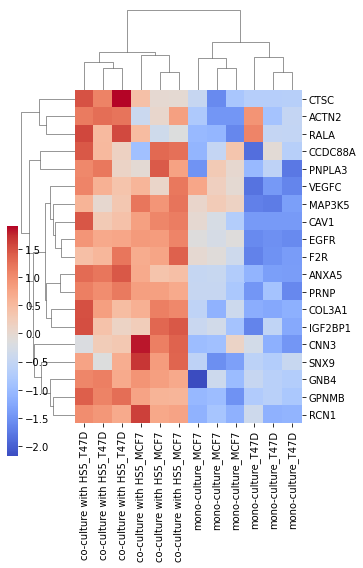

In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf
def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Saptarshi'
    d['Subject'] = "heatmap"
    d['Keywords'] = 'heatmap'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()
    
cfile = "/Users/sinha7290/public_html/BoNE/heatmaps/3D_19.pdf"
pdf = getPDF(cfile)

#data = pd.read_csv('/booleanfs2/sahoo/Data/Pradipta/RNASeq/Zarrinpar/Zarrinpar-2021-aging-expr.txt', sep='\t')
data = pd.read_csv('/booleanfs2/sahoo/Data/BooleanLab/Saptarshi/GSE152312/GSE152312-GPL18573-expr.txt', sep='\t')
#del data['ArrayID']
del data['ProbeID']

#Reverbα

#genes = ['SLCO2A1', 'SLCO2B1', 'ABCA1', 'ABCC1', 'ABCC2', 'ABCC3', 'ABCC4', 'ABCC5', 'ABCG2', 'SLC10A2', 'SLC15A2', 'SLC22A1', 'SLC22A11', 'SLC22A16', 'SLC22A3', 'SLC22A31', 'SLC22A4', 'SLC22A5', 'SLC28A1', 'SLC28A2', 'SLC28A3', 'SLC2A6', 'SLC34A2', 'SLC47A1', 'SLC5A8', 'SLCO1A2', 'SLCO1B1', 'SLCO3A1', 'SLCO4A1', 'SLC23A1', 'SLC23A2', 'SLC23A3']

genes = ['PRNP', 'F2R', 'GPNMB', 'RCN1', 'COL3A1', 'CTSC', 'ANXA5', 'EGFR', 'GNB4', 'CAV1', 'SNX9', 'IGF2BP1', 'CNN3', 'MAP3K5', 'PNPLA3', 'ACTN2', 'RALA', 'CCDC88A', 'VEGFC']

#genes = ['ABI3BP', 'ACSL4', 'ADAMTS1', 'ADM', 'AHNAK2', 'C1R', 'CCDC80', 'CCDC88A', 'CCN3', 'CDC42EP3', 'CDCP1', 'CEBPB', 'CEMIP', 'CLDN11', 'COL1A1', 'COL1A2', 'COL3A1', 'COL6A1', 'CXCL3', 'CXCL8', 'DCN', 'DPP4', 'DRAM1', 'DSEL', 'DUSP6', 'DZIP1', 'EBF1', 'EMP1', 'FAM126A', 'FBN1', 'FGF2', 'FGF5', 'FN1', 'FST', 'FSTL1', 'FYN', 'GADD45A', 'GBP1', 'GNG11', 'GPNMB', 'GREM1', 'HAS2', 'HMGA2', 'IER3-AS1', 'IFI16', 'IFI44L', 'IFI6', 'IFIT1', 'IFIT2', 'IFIT5', 'IGF2BP2', 'IL1B', 'INHBA', 'JAM2', 'LAMA4', 'LDHB', 'LMO4', 'MAP1B', 'MARS1', 'MDFIC', 'MEG3', 'MME', 'MMP1', 'MMP3', 'NAMPT', 'NIBAN1', 'NT5E', 'OAS1', 'PALM2AKAP2', 'PARP14', 'PARP9', 'PHLDA1', 'POU2F2', 'PRNP', 'PRRX1', 'PTGS2', 'PTX3', 'RAI14', 'RCN1', 'RND3', 'RPS4Y1', 'RSAD2', 'SERPINB2', 'SERPINE1', 'SERPINE2', 'SGCE', 'SLC7A11', 'SOD2', 'SP110', 'SPAG16', 'TAP2', 'TBX3', 'TCEAL9', 'TFPI2', 'TNC', 'VEGFA', 'VIM', 'WARS1', 'WNT5A', 'XAF1']
#single gene

data['Name'] = data['Name'].str.split(':', expand=True)[0]
data = data.set_index('Name', drop=True)
values = data.index.isin(genes)
data = data[values]
data = data.drop_duplicates()
#data =data[[M615760', 'GSM615206', 'GSM615289', 'GSM615809', 'GSM615350', 'GSM615356', 'GSM615345', 'GSM615196', 'GSM615792', 'GSM615814', 'GSM615121', 'GSM615726', 'GSM615256', 'GSM615188', 'GSM615253', 'GSM615216', 'GSM615634', 'GSM615645', 'GSM615789', 'GSM615662', 'GSM615720', 'GSM615736', 'GSM615669', 'GSM615795', 'GSM615749', 'GSM615635', 'GSM615808', 'GSM615391', 'GSM615235', 'GSM615358', 'GSM615238', 'GSM615373', 'GSM615267', 'GSM615129', 'GSM615633', 'GSM615343', 'GSM615377', 'GSM615655', 'GSM615821', 'GSM615308', 'GSM615279', 'GSM615401', 'GSM615174', 'GSM615123', 'GSM615138', 'GSM615788', 'GSM615670', 'GSM615735', 'GSM615802', 'GSM615404', 'GSM615708', 'GSM615108', 'GSM615709', 'GSM615398', 'GSM615304', 'GSM615673', 'GSM615309', 'GSM615200', 'GSM615353', 'GSM615153', 'GSM615702', 'GSM615281', 'GSM615163', 'GSM615269', 'GSM615227', 'GSM615367', 'GSM615652', 'GSM615793', 'GSM615775', 'GSM615803', 'GSM615822', 'GSM615812', 'GSM615796', 'GSM615280', 'GSM615302', 'GSM615340', 'GSM615159', 'GSM615771', 'GSM615130', 'GSM615762', 'GSM615823', 'GSM615678', 'GSM615139', 'GSM615785', 'GSM615778', 'GSM615754', 'GSM615250', 'GSM615271', 'GSM615282', 'GSM615157', 'GSM615274', 'GSM615753', 'GSM615230', 'GSM615197', 'GSM615249', 'GSM615774', 'GSM615405', 'GSM615215', 'GSM615342', 'GSM615286', 'GSM615182', 'GSM615805', 'GSM615189', 'GSM615652', 'GSM615793', 'GSM615775', 'GSM615803', 'GSM615822', 'GSM615812', 'GSM615796', 'GSM615280', 'GSM615302', 'GSM615340', 'GSM615159', 'GSM615771', 'GSM615130', 'GSM615762', 'GSM615823', 'GSM615678', 'GSM615139', 'GSM615785', 'GSM615778', 'GSM615754', 'GSM615250', 'GSM615271', 'GSM615282', 'GSM615157', 'GSM615274', 'GSM615753', 'GSM615230', 'GSM615197', 'GSM615249', 'GSM615774', 'GSM615405', 'GSM615215', 'GSM615342', 'GSM615286', 'GSM615182', 'GSM615805', 'GSM615189']]


data =data[['GSM4612360', 'GSM4612361', 'GSM4612362', 'GSM4612363', 'GSM4612364', 'GSM4612365', 'GSM4612372', 'GSM4612373', 'GSM4612374', 'GSM4612375', 'GSM4612376', 'GSM4612377']]

#data =data[['285-JB-13', '285-JB-15', '1454-JB-16', '285-JB-7', '139619', '285-JB-29', '285-JB-30', '139616', '1454-JB-1', '1454-JB-18', '285-JB-3', '285-JB-1', '285-JB-19', '1454-JB-4', '139618', '139620', '285-JB-21', '1454-JB-2']]

#data.index = pd.CategoricalIndex(data.index, categories= ['SLCO2A1', 'SLCO2B1', 'ABCA1', 'ABCC1', 'ABCC2', 'ABCC3', 'ABCC4', 'ABCC5', 'ABCG2', 'SLC10A2', 'SLC15A2', 'SLC22A1', 'SLC22A11', 'SLC22A16', 'SLC22A3', 'SLC22A31', 'SLC22A4', 'SLC22A5', 'SLC28A1', 'SLC28A2', 'SLC28A3', 'SLC2A6', 'SLC34A2', 'SLC47A1', 'SLC5A8', 'SLCO1A2', 'SLCO1B1', 'SLCO3A1', 'SLCO4A1', 'SLC23A1', 'SLC23A2', 'SLC23A3'])


#data.index = pd.CategoricalIndex(data.index, categories= ['CCN3', 'DSEL', 'EMP1', 'GPNMB', 'PRNP', 'RCN1', 'DRAM1', 'FAM126A', 'CCDC80', 'ADAMTS1', 'COL3A1', 'CDC42EP3', 'JAM2', 'CCDC88A', 'FSTL1', 'MAP1B', 'IL1B', 'GREM1', 'COL1A1', 'COL1A2', 'COL6A1', 'LMO4', 'C1R', 'SOD2', 'PARP9', 'PARP14', 'CEBPB', 'VEGFA', 'OAS1', 'POU2F2', 'AHNAK2', 'INHBA', 'FGF2', 'CEMIP', 'WNT5A'])
#single gene


#data.index = pd.CategoricalIndex(data.index, categories= ['ABI3BP', 'ACSL4'])
#single gene

data.sort_index(level=0, inplace=True)
data.reset_index(inplace=True)
#data.columns = ['Name','Addition of HS5 Conditioned Media1', 'Addition of HS5 Conditioned Media2', 'Addition of HS5 Conditioned Media3', 'Mono-CultureHS51', 'Mono-CultureHS52', 'Mono-CultureHS53', 'Mono-CultureHS54', 'Mono-CultureHS55', 'MCF7+HS5 Co-Culture1', 'MCF7+HS5 Co-Culture2', 'MCF7+HS5 Co-Culture3', 'MCF7+HS5 Co-Culture4', 'MCF7+HS5 Co-Culture5', 'Mono-CultureMCF71', 'Mono-CultureMCF72', 'Mono-CultureMCF73', 'Mono-CultureMCF74', 'Mono-CultureMCF75']
data=data.rename(columns = {'GSM4612360': 'mono-culture_MCF7', 'GSM4612361': 'mono-culture_MCF7', 'GSM4612362': 'mono-culture_MCF7', 'GSM4612363': 'co-culture with HS5_MCF7', 'GSM4612364': 'co-culture with HS5_MCF7', 'GSM4612365': 'co-culture with HS5_MCF7', 'GSM4612372': 'mono-culture_T47D', 'GSM4612373': 'mono-culture_T47D', 'GSM4612374': 'mono-culture_T47D', 'GSM4612375': 'co-culture with HS5_T47D', 'GSM4612376': 'co-culture with HS5_T47D', 'GSM4612377': 'co-culture with HS5_T47D'})
#data = data.drop(labels=[1,2,3,4,5,6,7,11], axis=0) #to delete duplicates
#data = data.drop(labels=[12,13,14,15,16,25], axis=0) #to delete duplicates

data=data.set_index('Name')
data
Y=list(data.index)
X=list(data.columns)
Z=zscore(data, axis=1)

#for i in Z:
#    print (i)
#Y
#fig, ax = plt.subplots(figsize = (20, 6))

#sns.heatmap(data,cmap ='coolwarm', annot=False,xticklabels=X, yticklabels=Y)
sns.clustermap(Z, row_cluster=True, figsize=(5, 8), col_cluster=True, cbar_pos=(0, .2, .03, .4), cmap='coolwarm',xticklabels=X, yticklabels=Y)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

[5, 7, 10, 28, 29, 6, 12, 26, 3, 24, 11, 27, 22, 4, 19, 21, 15, 23, 18, 0, 2, 9, 14, 16, 17, 25, 1, 8, 13, 20]


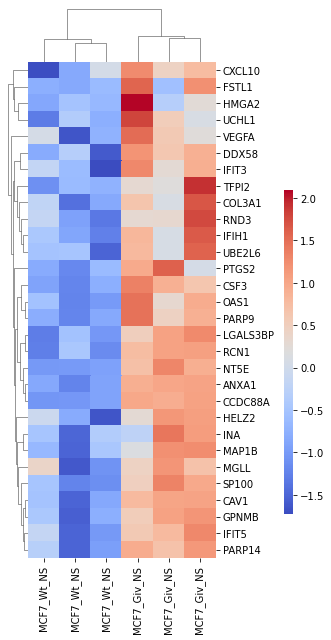

In [5]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf
def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Saptarshi'
    d['Subject'] = "heatmap"
    d['Keywords'] = 'heatmap'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()
    
cfile = "/Users/sinha7290/public_html/BoNE/heatmaps/32_mcf7.pdf"
pdf = getPDF(cfile)
data = pd.read_csv('/booleanfs2/sahoo/Data/BooleanLab/Saptarshi/MCF7/pg-MCF7-expr.txt', sep='\t')
del data['ProbeID']
#genes = ['REG4', 'CEACAM5', 'HOXB9', 'HOXA9', 'GPA33', 'HMGCS2', 'SPON1', 'KRT20', 'HOXB8', 'SCARNA22', 'FABP1', 'MUC12', 'PLA2G2A', 'PHGR1', 'CDH17', 'XIST', 'HOXB7', 'LINC02086', 'ANPEP', 'HOXA10', 'CEACAM7', 'MIR1307', 'NOX1', 'PAPSS2', 'PIGR', 'UGT1A10', 'HOXA10-AS', 'NT5E', 'HSD17B2', 'IL33', 'SPINK4', 'TMEM238L', 'MT1G', 'FFAR4', 'HOXA7', 'HOXB6', 'MMEL1', 'NEFL', 'SMIM24', 'ABCB1', 'CA1', 'PDZD3', 'TFF1', 'DHRS9', 'SNORA50C', 'PADI2', 'FABP6', 'REN', 'MUC5B', 'FAM3D', 'CDHR5', 'BTNL9', 'PARM1', 'ARHGDIG', 'AKR7A3', 'ENPP3', 'HOXB5', 'MUC2', 'ARSL', 'SLC51A', 'HOXA11-AS', 'GUCA2A', 'CA2', 'OLFM4', 'TMEM171', 'KRT8P3', 'NOSTRIN', 'SATB2', 'SERPINE2', 'AOAH', 'SOD3', 'DPP4', 'BTNL8', 'PRSS2', 'CELF2', 'SERPINB5', 'FBP1', 'SLC26A3', 'PRSS1', 'RARRES1', 'POU5F1', 'CA4']
#top old#
#genes = ['MYC','HNF4A','ATF3', 'ATF4', 'YAP1', 'TAZ', 'JUN','CDX2', 'PRKAB1', 'CCDC88A', 'OCT4', 'KLF4', 'GATA6', 'GCNF']
#top young

genes = ['CCDC88A', 'ANXA1', 'PSMB9', 'CSF3', 'LGALS3BP', 'SP100', 'NT5E', 'RCN1', 'PSMB8', 'PARP9', 'OAS1', 'GPNMB', 'CAV1', 'PARP14', 'MAP1B', 'DDX58', 'IFIT5', 'UBE2L6', 'IFIH1', 'HELZ2', 'PTGS2', 'IFIT3', 'COL3A1', 'RND3', 'CXCL10', 'UCHL1', 'VEGFA', 'INA', 'TFPI2', 'MGLL', 'FSTL1', 'HMGA2']
#32


data['Name'] = data['Name'].str.split(':', expand=True)[0]
data = data.set_index('Name', drop=True)
values = data.index.isin(genes)
data = data[values]
data = data.drop_duplicates()
data.sort_index(level=0, inplace=True)
data.reset_index(inplace=True)
data = data.drop(labels=[22,23,24,25,26,27,28,29,30], axis=0) #to delete duplicates



#data.index = pd.CategoricalIndex(data.index, categories= ['REG4', 'CEACAM5', 'HOXB9', 'HOXA9', 'GPA33', 'HMGCS2', 'SPON1', 'KRT20', 'HOXB8', 'SCARNA22', 'FABP1', 'MUC12', 'PLA2G2A', 'PHGR1', 'CDH17', 'XIST', 'HOXB7', 'LINC02086', 'ANPEP', 'HOXA10', 'CEACAM7', 'MIR1307', 'NOX1', 'PAPSS2', 'PIGR', 'UGT1A10', 'HOXA10-AS', 'NT5E', 'HSD17B2', 'IL33', 'SPINK4', 'TMEM238L', 'MT1G', 'FFAR4', 'HOXA7', 'HOXB6', 'MMEL1', 'NEFL', 'SMIM24', 'ABCB1', 'CA1', 'PDZD3', 'TFF1', 'DHRS9', 'SNORA50C', 'PADI2', 'FABP6', 'REN', 'MUC5B', 'FAM3D', 'CDHR5', 'BTNL9', 'PARM1', 'ARHGDIG', 'AKR7A3', 'ENPP3', 'HOXB5', 'MUC2', 'ARSL', 'SLC51A', 'HOXA11-AS', 'GUCA2A', 'CA2', 'OLFM4', 'TMEM171', 'KRT8P3', 'NOSTRIN', 'SATB2', 'SERPINE2', 'AOAH', 'SOD3', 'DPP4', 'BTNL8', 'PRSS2', 'CELF2', 'SERPINB5', 'FBP1', 'SLC26A3', 'PRSS1', 'RARRES1', 'POU5F1', 'CA4'])
#top old#
#data.index = pd.CategoricalIndex(data.index, categories= ['MYC','HNF4A','ATF3', 'ATF4', 'YAP1', 'TAZ','JUN','CDX2', 'PRKAB1', 'CCDC88A', 'OCT4', 'KLF4', 'GATA6', 'GCNF'])
#top young

#data.index = pd.CategoricalIndex(data.index, categories= ['MYC', 'CCDC88A', 'PRKAB1', 'CDX2', 'ATF4', 'YAP1'])
#top young

data=data.set_index('Name')
#data =data[['org_h12_colon_p14_S6_L003', 'H18_S94_L003', 'org_H14_Colon_p13_S1_L003', 'H14_S90_L003', 'H19_S95_L003', 'H15_S91_L003', 'H16_S92_L003', 'H17_S93_L003', 'org_H4_Colon_p35_S7_L003', 'H20_S96_L003']]
#data=data.rename(columns = {'org_h12_colon_p14_S6_L003': '0', 'H18_S94_L003': '41', 'org_H14_Colon_p13_S1_L003': '45_1', 'H14_S90_L003': '45_2', 'H19_S95_L003': '48', 'H15_S91_L003': '49', 'H16_S92_L003': '53', 'H17_S93_L003': '61', 'org_H4_Colon_p35_S7_L003': '64', 'H20_S96_L003': '67'})

#data =data[['org_h12_colon_p14_S6_L003', 'H18_S94_L003', 'H15_S91_L003', 'H16_S92_L003', 'H17_S93_L003', 'H20_S96_L003']]
#data=data.rename(columns = {'org_h12_colon_p14_S6_L003':  '0', 'H18_S94_L003':  '41', 'H15_S91_L003':  '49', 'H16_S92_L003':  '53', 'H17_S93_L003':  '61', 'H20_S96_L003':  '67'})
data =data[['MCF7_Giv_NS_NE1_S1', 'MCF7_Giv_NS_NE2_S2', 'MCF7_Giv_NS_NE3_S3', 'MCF7_Wt_NS_NE1_S7', 'MCF7_Wt_NS_NE2_S8', 'MCF7_Wt_NS_NE3_S9']]
data=data.rename(columns = {'MCF7_Giv_NS_NE1_S1': 'MCF7_Giv_NS', 'MCF7_Giv_NS_NE2_S2': 'MCF7_Giv_NS', 'MCF7_Giv_NS_NE3_S3': 'MCF7_Giv_NS', 'MCF7_Wt_NS_NE1_S7': 'MCF7_Wt_NS', 'MCF7_Wt_NS_NE2_S8': 'MCF7_Wt_NS', 'MCF7_Wt_NS_NE3_S9': 'MCF7_Wt_NS'})
data=data.loc[~(data==0).all(axis=1)]

#fig, ax = plt.subplots(figsize = (6, 10))


Y=list(data.index)
X=list(data.columns)
Z=zscore(data, axis=1)
res=sns.clustermap(Z, row_cluster=True, figsize=(4, 9), col_cluster=True,dendrogram_ratio=0.1, cbar_pos=(1, .2, .03, .5), cmap='coolwarm',xticklabels=X, yticklabels=Y)
#sns.heatmap(Z,cmap ='coolwarm', annot=False,xticklabels=X, yticklabels=Y)

pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)
print(res.dendrogram_row.reordered_ind)

[14, 10, 8, 7, 9, 5, 13, 12, 2, 11, 3, 1, 6, 16, 0, 4, 15]


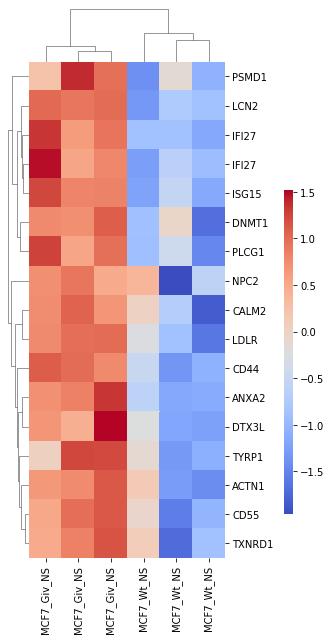

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf
def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Saptarshi'
    d['Subject'] = "heatmap"
    d['Keywords'] = 'heatmap'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()
    
cfile = "/Users/sinha7290/public_html/BoNE/heatmaps/32_mcf7.pdf"
pdf = getPDF(cfile)
data = pd.read_csv('/booleanfs2/sahoo/Data/BooleanLab/Saptarshi/MCF7/pg-MCF7-expr.txt', sep='\t')
del data['ProbeID']
#genes = ['REG4', 'CEACAM5', 'HOXB9', 'HOXA9', 'GPA33', 'HMGCS2', 'SPON1', 'KRT20', 'HOXB8', 'SCARNA22', 'FABP1', 'MUC12', 'PLA2G2A', 'PHGR1', 'CDH17', 'XIST', 'HOXB7', 'LINC02086', 'ANPEP', 'HOXA10', 'CEACAM7', 'MIR1307', 'NOX1', 'PAPSS2', 'PIGR', 'UGT1A10', 'HOXA10-AS', 'NT5E', 'HSD17B2', 'IL33', 'SPINK4', 'TMEM238L', 'MT1G', 'FFAR4', 'HOXA7', 'HOXB6', 'MMEL1', 'NEFL', 'SMIM24', 'ABCB1', 'CA1', 'PDZD3', 'TFF1', 'DHRS9', 'SNORA50C', 'PADI2', 'FABP6', 'REN', 'MUC5B', 'FAM3D', 'CDHR5', 'BTNL9', 'PARM1', 'ARHGDIG', 'AKR7A3', 'ENPP3', 'HOXB5', 'MUC2', 'ARSL', 'SLC51A', 'HOXA11-AS', 'GUCA2A', 'CA2', 'OLFM4', 'TMEM171', 'KRT8P3', 'NOSTRIN', 'SATB2', 'SERPINE2', 'AOAH', 'SOD3', 'DPP4', 'BTNL8', 'PRSS2', 'CELF2', 'SERPINB5', 'FBP1', 'SLC26A3', 'PRSS1', 'RARRES1', 'POU5F1', 'CA4']
#top old#
#genes = ['MYC','HNF4A','ATF3', 'ATF4', 'YAP1', 'TAZ', 'JUN','CDX2', 'PRKAB1', 'CCDC88A', 'OCT4', 'KLF4', 'GATA6', 'GCNF']
#top young

genes = ['PSMD1', 'DNMT1', 'ISG15', 'LCN2', 'IFI27', 'PLCG1', 'NPC2', 'CALM2', 'LDLR', 'CD44', 'ANXA2', 'DTX3L', 'TYRP1', 'ACTN1', 'CD55', 'TXNRD1']



data['Name'] = data['Name'].str.split(':', expand=True)[0]
data = data.set_index('Name', drop=True)
values = data.index.isin(genes)
data = data[values]
data = data.drop_duplicates()
data.sort_index(level=0, inplace=True)
data.reset_index(inplace=True)
#data = data.drop(labels=[22,23,24,25,26,27,28,29,30], axis=0) #to delete duplicates



#data.index = pd.CategoricalIndex(data.index, categories= ['REG4', 'CEACAM5', 'HOXB9', 'HOXA9', 'GPA33', 'HMGCS2', 'SPON1', 'KRT20', 'HOXB8', 'SCARNA22', 'FABP1', 'MUC12', 'PLA2G2A', 'PHGR1', 'CDH17', 'XIST', 'HOXB7', 'LINC02086', 'ANPEP', 'HOXA10', 'CEACAM7', 'MIR1307', 'NOX1', 'PAPSS2', 'PIGR', 'UGT1A10', 'HOXA10-AS', 'NT5E', 'HSD17B2', 'IL33', 'SPINK4', 'TMEM238L', 'MT1G', 'FFAR4', 'HOXA7', 'HOXB6', 'MMEL1', 'NEFL', 'SMIM24', 'ABCB1', 'CA1', 'PDZD3', 'TFF1', 'DHRS9', 'SNORA50C', 'PADI2', 'FABP6', 'REN', 'MUC5B', 'FAM3D', 'CDHR5', 'BTNL9', 'PARM1', 'ARHGDIG', 'AKR7A3', 'ENPP3', 'HOXB5', 'MUC2', 'ARSL', 'SLC51A', 'HOXA11-AS', 'GUCA2A', 'CA2', 'OLFM4', 'TMEM171', 'KRT8P3', 'NOSTRIN', 'SATB2', 'SERPINE2', 'AOAH', 'SOD3', 'DPP4', 'BTNL8', 'PRSS2', 'CELF2', 'SERPINB5', 'FBP1', 'SLC26A3', 'PRSS1', 'RARRES1', 'POU5F1', 'CA4'])
#top old#
#data.index = pd.CategoricalIndex(data.index, categories= ['MYC','HNF4A','ATF3', 'ATF4', 'YAP1', 'TAZ','JUN','CDX2', 'PRKAB1', 'CCDC88A', 'OCT4', 'KLF4', 'GATA6', 'GCNF'])
#top young

#data.index = pd.CategoricalIndex(data.index, categories= ['MYC', 'CCDC88A', 'PRKAB1', 'CDX2', 'ATF4', 'YAP1'])
#top young

data=data.set_index('Name')
#data =data[['org_h12_colon_p14_S6_L003', 'H18_S94_L003', 'org_H14_Colon_p13_S1_L003', 'H14_S90_L003', 'H19_S95_L003', 'H15_S91_L003', 'H16_S92_L003', 'H17_S93_L003', 'org_H4_Colon_p35_S7_L003', 'H20_S96_L003']]
#data=data.rename(columns = {'org_h12_colon_p14_S6_L003': '0', 'H18_S94_L003': '41', 'org_H14_Colon_p13_S1_L003': '45_1', 'H14_S90_L003': '45_2', 'H19_S95_L003': '48', 'H15_S91_L003': '49', 'H16_S92_L003': '53', 'H17_S93_L003': '61', 'org_H4_Colon_p35_S7_L003': '64', 'H20_S96_L003': '67'})

#data =data[['org_h12_colon_p14_S6_L003', 'H18_S94_L003', 'H15_S91_L003', 'H16_S92_L003', 'H17_S93_L003', 'H20_S96_L003']]
#data=data.rename(columns = {'org_h12_colon_p14_S6_L003':  '0', 'H18_S94_L003':  '41', 'H15_S91_L003':  '49', 'H16_S92_L003':  '53', 'H17_S93_L003':  '61', 'H20_S96_L003':  '67'})
data =data[['MCF7_Giv_NS_NE1_S1', 'MCF7_Giv_NS_NE2_S2', 'MCF7_Giv_NS_NE3_S3', 'MCF7_Wt_NS_NE1_S7', 'MCF7_Wt_NS_NE2_S8', 'MCF7_Wt_NS_NE3_S9']]
data=data.rename(columns = {'MCF7_Giv_NS_NE1_S1': 'MCF7_Giv_NS', 'MCF7_Giv_NS_NE2_S2': 'MCF7_Giv_NS', 'MCF7_Giv_NS_NE3_S3': 'MCF7_Giv_NS', 'MCF7_Wt_NS_NE1_S7': 'MCF7_Wt_NS', 'MCF7_Wt_NS_NE2_S8': 'MCF7_Wt_NS', 'MCF7_Wt_NS_NE3_S9': 'MCF7_Wt_NS'})
data=data.loc[~(data==0).all(axis=1)]

#fig, ax = plt.subplots(figsize = (6, 10))


Y=list(data.index)
X=list(data.columns)
Z=zscore(data, axis=1)
res=sns.clustermap(Z, row_cluster=True, figsize=(4, 9), col_cluster=True,dendrogram_ratio=0.1, cbar_pos=(1, .2, .03, .5), cmap='coolwarm',xticklabels=X, yticklabels=Y)
#sns.heatmap(Z,cmap ='coolwarm', annot=False,xticklabels=X, yticklabels=Y)

pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)
print(res.dendrogram_row.reordered_ind)

[18, 2, 27, 11, 25, 6, 21, 3, 7, 12, 23, 26, 20, 31, 9, 15, 13, 30, 24, 17, 1, 16, 14, 22, 19, 10, 28, 0, 4, 29, 5, 8]


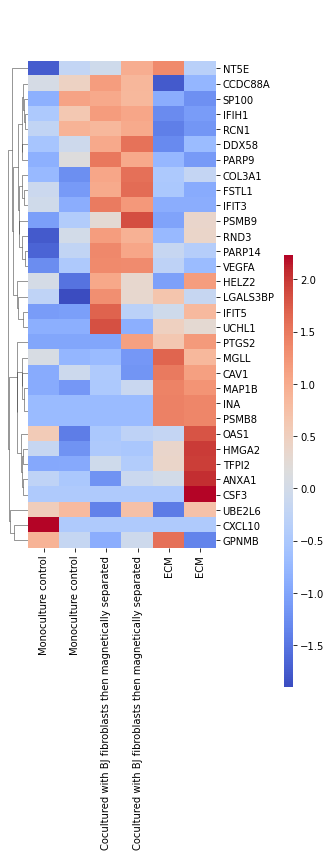

In [18]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf
def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Saptarshi'
    d['Subject'] = "heatmap"
    d['Keywords'] = 'heatmap'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()
    
cfile = "/Users/sinha7290/public_html/BoNE/CX43_github/32.pdf"
pdf = getPDF(cfile)
data = pd.read_csv('/booleanfs2/sahoo/Data/BooleanLab/Saptarshi/GSE137528/GSE137528-GPL20301-expr.txt', sep='\t')
del data['ProbeID']
#genes = ['REG4', 'CEACAM5', 'HOXB9', 'HOXA9', 'GPA33', 'HMGCS2', 'SPON1', 'KRT20', 'HOXB8', 'SCARNA22', 'FABP1', 'MUC12', 'PLA2G2A', 'PHGR1', 'CDH17', 'XIST', 'HOXB7', 'LINC02086', 'ANPEP', 'HOXA10', 'CEACAM7', 'MIR1307', 'NOX1', 'PAPSS2', 'PIGR', 'UGT1A10', 'HOXA10-AS', 'NT5E', 'HSD17B2', 'IL33', 'SPINK4', 'TMEM238L', 'MT1G', 'FFAR4', 'HOXA7', 'HOXB6', 'MMEL1', 'NEFL', 'SMIM24', 'ABCB1', 'CA1', 'PDZD3', 'TFF1', 'DHRS9', 'SNORA50C', 'PADI2', 'FABP6', 'REN', 'MUC5B', 'FAM3D', 'CDHR5', 'BTNL9', 'PARM1', 'ARHGDIG', 'AKR7A3', 'ENPP3', 'HOXB5', 'MUC2', 'ARSL', 'SLC51A', 'HOXA11-AS', 'GUCA2A', 'CA2', 'OLFM4', 'TMEM171', 'KRT8P3', 'NOSTRIN', 'SATB2', 'SERPINE2', 'AOAH', 'SOD3', 'DPP4', 'BTNL8', 'PRSS2', 'CELF2', 'SERPINB5', 'FBP1', 'SLC26A3', 'PRSS1', 'RARRES1', 'POU5F1', 'CA4']
#top old#
#genes = ['MYC','HNF4A','ATF3', 'ATF4', 'YAP1', 'TAZ', 'JUN','CDX2', 'PRKAB1', 'CCDC88A', 'OCT4', 'KLF4', 'GATA6', 'GCNF']
#top young

#genes = ['ABI3BP', 'ACSL4', 'AGPS', 'ANXA1', 'CALD1', 'CMPK2', 'CNN3', 'CSPG4', 'DAB2', 'DPP4', 'EGFR', 'FBN1', 'FGF2', 'FLNC', 'FOSL1', 'FST', 'FSTL1', 'HMGA2', 'ICAM1', 'IL1B', 'LDHB', 'MAP1B', 'MME', 'MMP1', 'MMP3', 'MYL9', 'NAMPT', 'NEFL', 'PHGDH', 'PSAT1', 'RAC2', 'RCN1', 'RND3', 'SERPINB2', 'SERPINE1', 'SERPINE2', 'TFPI2', 'UCHL1', 'KYNU']

#genes = ['PRNP', 'F2R', 'GPNMB', 'RCN1', 'COL3A1', 'CTSC', 'ANXA5', 'EGFR', 'GNB4', 'CAV1', 'SNX9', 'IGF2BP1', 'CNN3', 'MAP3K5', 'PNPLA3', 'ACTN2', 'RALA', 'CCDC88A', 'VEGFC']

#genes=['ANXA5', 'GPNMB', 'CAV1', 'CNN3', 'GNB4', 'PRNP', 'RALA', 'SNX9', 'VEGFC', 'IGF2BP1', 'ACTN2', 'CTSC', 'RCN1', 'F2R', 'MAP3K5', 'EGFR', 'COL3A1', 'CCDC88A', 'PNPLA3']

genes = ['CCDC88A', 'ANXA1', 'PSMB9', 'CSF3', 'LGALS3BP', 'SP100', 'NT5E', 'RCN1', 'PSMB8', 'PARP9', 'OAS1', 'GPNMB', 'CAV1', 'PARP14', 'MAP1B', 'DDX58', 'IFIT5', 'UBE2L6', 'IFIH1', 'HELZ2', 'PTGS2', 'IFIT3', 'COL3A1', 'RND3', 'CXCL10', 'UCHL1', 'VEGFA', 'INA', 'TFPI2', 'MGLL', 'FSTL1', 'HMGA2']
#32

#genes = ['PSMD1', 'DNMT1', 'ISG15', 'LCN2', 'IFI27', 'PLCG1', 'NPC2', 'CALM2', 'LDLR', 'CD44', 'ANXA2', 'DTX3L', 'TYRP1', 'ACTN1', 'CD55', 'TXNRD1']
#17


data['Name'] = data['Name'].str.split(':', expand=True)[0]
data = data.set_index('Name', drop=True)
values = data.index.isin(genes)
data = data[values]
data = data.drop_duplicates()
data.sort_index(level=0, inplace=True)
data.reset_index(inplace=True)
#data = data.drop(labels=[22,23,24,25,26,27,28,29,30], axis=0) #to delete duplicates



#data.index = pd.CategoricalIndex(data.index, categories= ['REG4', 'CEACAM5', 'HOXB9', 'HOXA9', 'GPA33', 'HMGCS2', 'SPON1', 'KRT20', 'HOXB8', 'SCARNA22', 'FABP1', 'MUC12', 'PLA2G2A', 'PHGR1', 'CDH17', 'XIST', 'HOXB7', 'LINC02086', 'ANPEP', 'HOXA10', 'CEACAM7', 'MIR1307', 'NOX1', 'PAPSS2', 'PIGR', 'UGT1A10', 'HOXA10-AS', 'NT5E', 'HSD17B2', 'IL33', 'SPINK4', 'TMEM238L', 'MT1G', 'FFAR4', 'HOXA7', 'HOXB6', 'MMEL1', 'NEFL', 'SMIM24', 'ABCB1', 'CA1', 'PDZD3', 'TFF1', 'DHRS9', 'SNORA50C', 'PADI2', 'FABP6', 'REN', 'MUC5B', 'FAM3D', 'CDHR5', 'BTNL9', 'PARM1', 'ARHGDIG', 'AKR7A3', 'ENPP3', 'HOXB5', 'MUC2', 'ARSL', 'SLC51A', 'HOXA11-AS', 'GUCA2A', 'CA2', 'OLFM4', 'TMEM171', 'KRT8P3', 'NOSTRIN', 'SATB2', 'SERPINE2', 'AOAH', 'SOD3', 'DPP4', 'BTNL8', 'PRSS2', 'CELF2', 'SERPINB5', 'FBP1', 'SLC26A3', 'PRSS1', 'RARRES1', 'POU5F1', 'CA4'])
#top old#
#data.index = pd.CategoricalIndex(data.index, categories= ['MYC','HNF4A','ATF3', 'ATF4', 'YAP1', 'TAZ','JUN','CDX2', 'PRKAB1', 'CCDC88A', 'OCT4', 'KLF4', 'GATA6', 'GCNF'])
#top young

#data.index = pd.CategoricalIndex(data.index, categories= ['MYC', 'CCDC88A', 'PRKAB1', 'CDX2', 'ATF4', 'YAP1'])
#top young

data=data.set_index('Name')
#data =data[['org_h12_colon_p14_S6_L003', 'H18_S94_L003', 'org_H14_Colon_p13_S1_L003', 'H14_S90_L003', 'H19_S95_L003', 'H15_S91_L003', 'H16_S92_L003', 'H17_S93_L003', 'org_H4_Colon_p35_S7_L003', 'H20_S96_L003']]
#data=data.rename(columns = {'org_h12_colon_p14_S6_L003': '0', 'H18_S94_L003': '41', 'org_H14_Colon_p13_S1_L003': '45_1', 'H14_S90_L003': '45_2', 'H19_S95_L003': '48', 'H15_S91_L003': '49', 'H16_S92_L003': '53', 'H17_S93_L003': '61', 'org_H4_Colon_p35_S7_L003': '64', 'H20_S96_L003': '67'})

#data =data[['org_h12_colon_p14_S6_L003', 'H18_S94_L003', 'H15_S91_L003', 'H16_S92_L003', 'H17_S93_L003', 'H20_S96_L003']]
#data=data.rename(columns = {'org_h12_colon_p14_S6_L003':  '0', 'H18_S94_L003':  '41', 'H15_S91_L003':  '49', 'H16_S92_L003':  '53', 'H17_S93_L003':  '61', 'H20_S96_L003':  '67'})
data =data[['GSM4081348', 'GSM4081349', 'GSM4081350', 'GSM4081351','GSM4081354','GSM4081355']]
data=data.rename(columns = {'GSM4081348': 'Monoculture control', 'GSM4081349': 'Monoculture control', 'GSM4081350': 'Cocultured with BJ fibroblasts then magnetically separated', 'GSM4081351': 'Cocultured with BJ fibroblasts then magnetically separated','GSM4081354': 'ECM', 'GSM4081355': 'ECM'})
data=data.loc[~(data==0).all(axis=1)]

#fig, ax = plt.subplots(figsize = (6, 10))


Y=list(data.index)
X=list(data.columns)
Z=zscore(data, axis=1)
res=sns.clustermap(Z, row_cluster=True, figsize=(4, 12), col_cluster=False,dendrogram_ratio=0.1, cbar_pos=(1, .2, .03, .5), cmap='coolwarm',xticklabels=X, yticklabels=Y)
#sns.heatmap(Z,cmap ='coolwarm', annot=False,xticklabels=X, yticklabels=Y)

pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)
print(res.dendrogram_row.reordered_ind)